In [1]:
##### __Author__ = "Askar Babu U"
##### __Version__ = "1.0"
##### __Email__ = "askarbx2020@email.iimcal.ac.in"
##### __Last updated__ =8/17/2021

<h3> Read and Understand the data

In [ ]:
#uncomment the following comments while running the script for the first time

#pip install --user xgboost
#pip install --user matplotlib==3.4.1

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Import libraries for data visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#suppress scientific notation while displaying

pd.set_option('display.float_format', lambda x: f'{x:,.1f}')

In [ ]:
#read the dataset

property_df = pd.read_csv('data_science_challenge_data.csv')
property_df.index.name = 'ppty_id'

In [ ]:
property_df.shape

(67107, 6)

In [ ]:
property_df.columns

Index(['neighbourhood', 'price', 'size', 'bedrooms', 'bathrooms', 'building'], dtype='object')

In [ ]:
property_df.head(5)

,neighbourhood,price,size,bedrooms,bathrooms,building
ppty_id,,,,,,
0,SNR,"130,000.0","1,300.0",2,3.0,Building_263
1,ZMS,"140,000.0","1,185.0",1,2.0,Building_25
2,ZMS,"250,000.0","2,050.0",3,5.0,Building_324
3,ZMS,"250,000.0","3,860.0",4,5.0,Building_353
4,SNR,"170,000.0","1,896.0",3,4.0,Building_280


In [ ]:
print ("number of distinct buildings are :{}".format(property_df.building.nunique(dropna = True)))
print ("number of distinct neighbourhood are :{}".format(property_df.neighbourhood.nunique(dropna = True)))

number of distinct buildings are :353
number of distinct neighbourhood are :3


In [ ]:
#check the distinct neighbourhoods in the data

property_df.neighbourhood.unique()

array(['SNR', 'ZMS', 'PLY'], dtype=object)

In [ ]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67107 entries, 0 to 67106
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   neighbourhood  67107 non-null  object 
 1   price          67107 non-null  float64
 2   size           67107 non-null  float64
 3   bedrooms       67107 non-null  int64  
 4   bathrooms      63657 non-null  float64
 5   building       61068 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
#Check out the summary statistics of the data

property_df.describe()

,price,size,bedrooms,bathrooms
count,"67,107.0","67,107.0","67,107.0","63,657.0"
mean,"219,911.8","1,621.6",1.7,2.4
std,"5,882,341.6","9,049.5",1.0,1.1
min,"22,000.0",-755.0,0.0,1.0
25%,"99,000.0",840.0,1.0,2.0
50%,"130,000.0","1,200.0",2.0,2.0
75%,"165,000.0","1,637.0",2.0,3.0
max,"565,352,964.0","1,170,000.0",12.0,12.0


In [ ]:
# Checking Null values

property_df.isnull().sum()

neighbourhood       0
price               0
size                0
bedrooms            0
bathrooms        3450
building         6039
dtype: int64

<h4>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


The script below has 2 major parts<br>
    1.EDA<br>
    2.Modelling

<h2>1. EDA

    EDA contains 2 sections
    1.1 Univariate Analysis
    1.2 Bivariate Analysis

<h3>1.1 Univariate Analysis

<h4> Data Cleaning

Price and Size are numerical variables.bedrooms,bathrooms are ordinal categorical variables.neighbourhood and building are nominal categorical variables <br>
Relevent plots are considered for each type of variables in this section

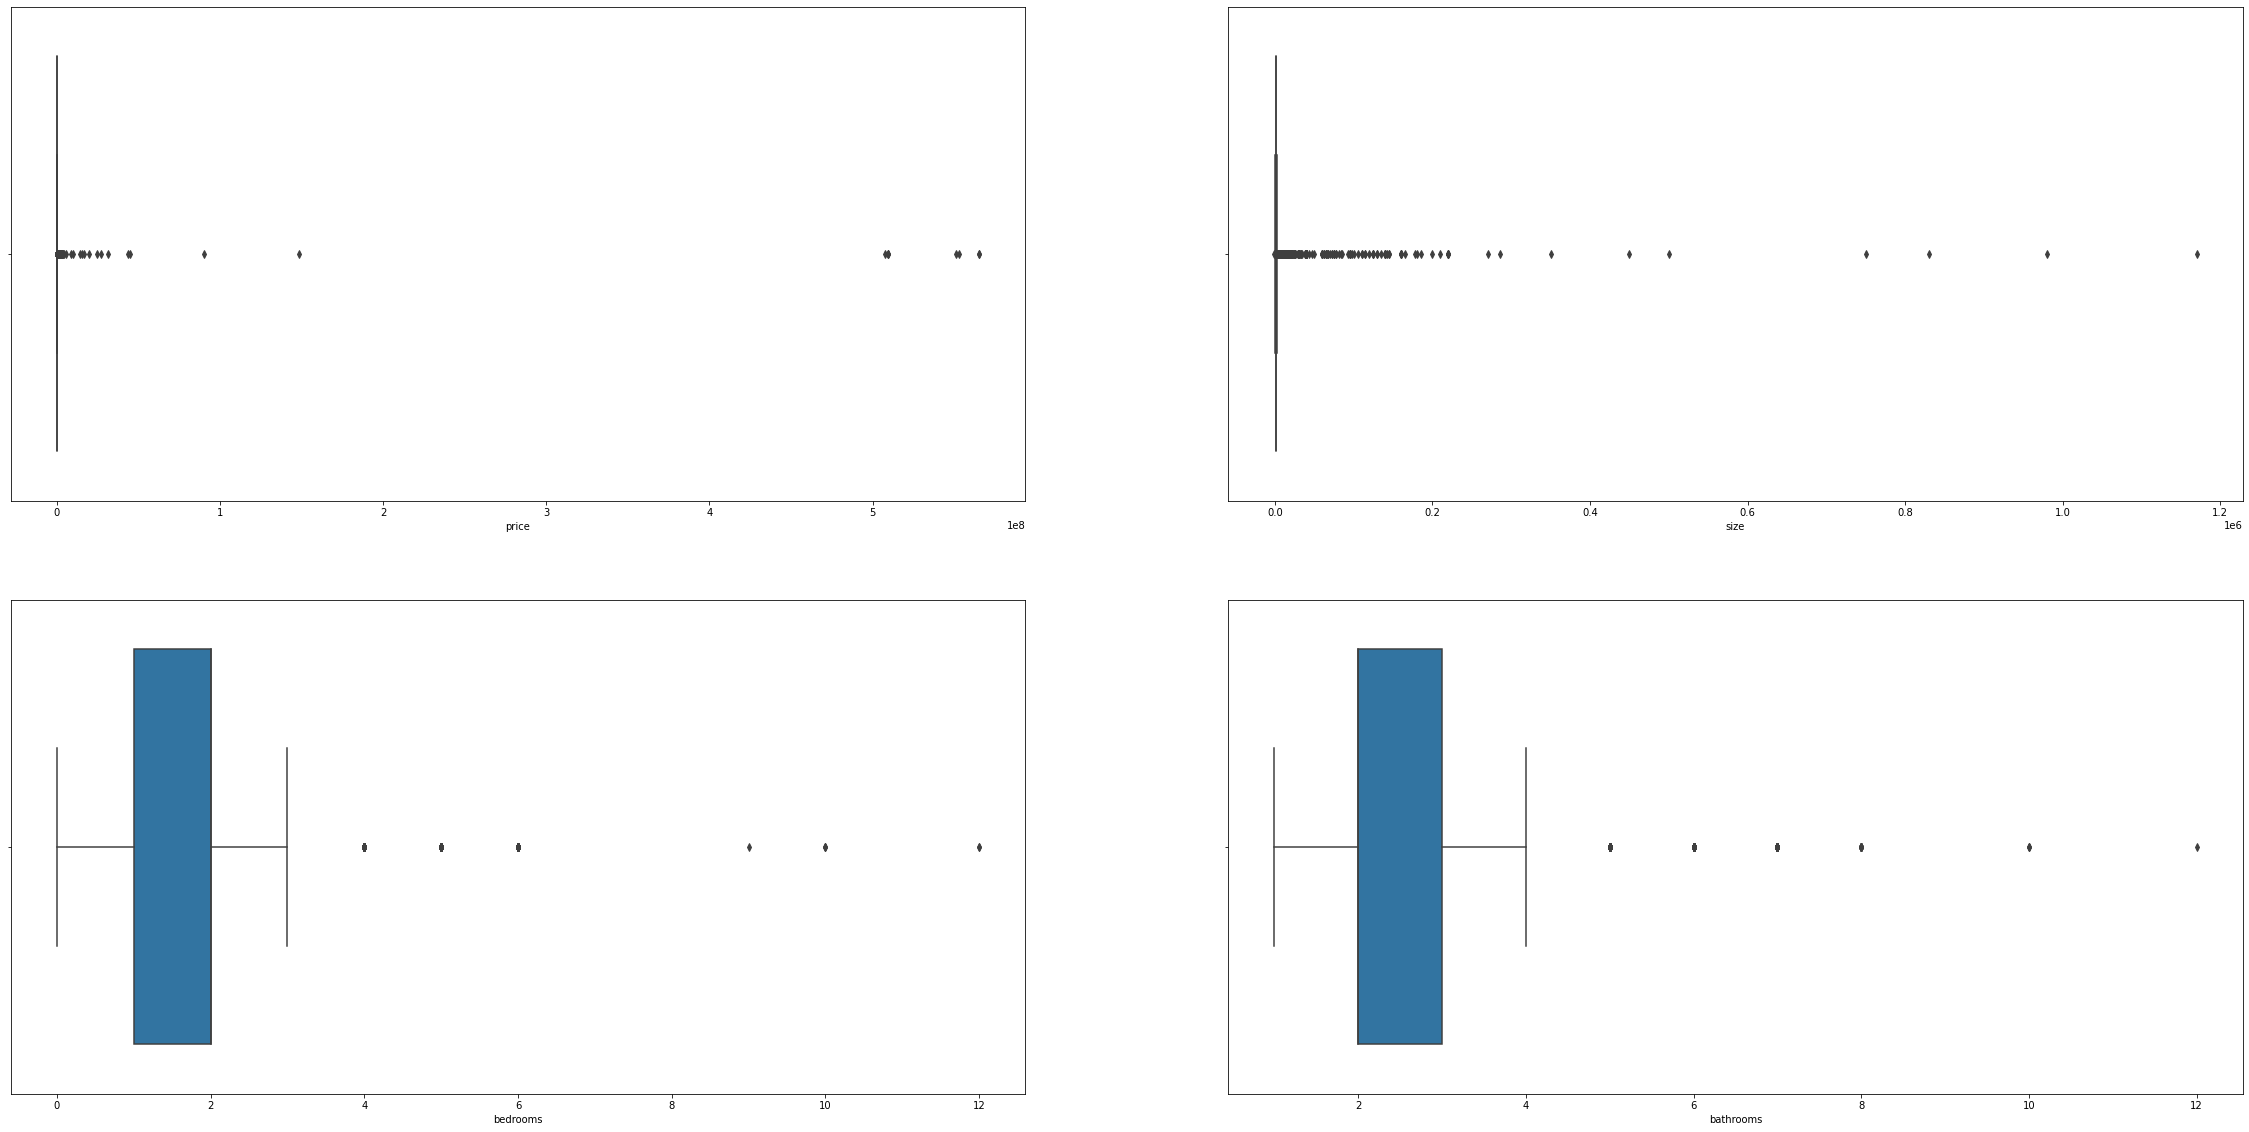

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (40,20))
plt1 = sns.boxplot(property_df['price'], ax = axs[0,0])
plt2 = sns.boxplot(property_df['size'], ax = axs[0,1])
plt3 = sns.boxplot(property_df['bedrooms'], ax = axs[1,0])
plt1 = sns.boxplot(property_df['bathrooms'], ax = axs[1,1])

plt.show()

Lets have a deeper look at the price variable

Price

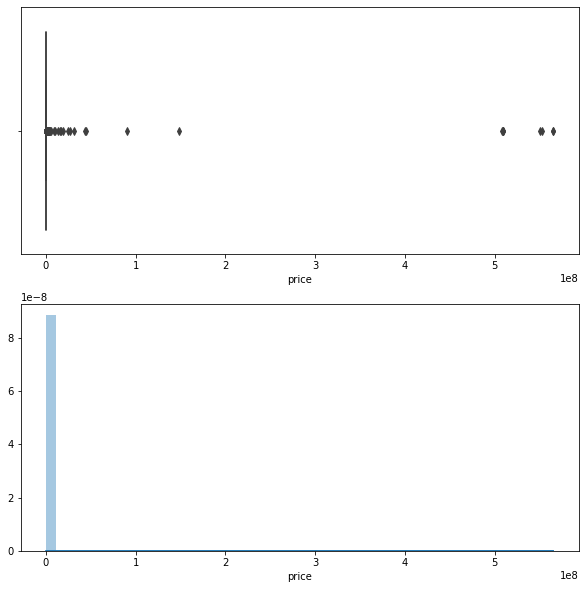

In [ ]:
# Outlier Analysis for price
fig, axs = plt.subplots(2,1, figsize = (10,10))
plt1 = sns.boxplot(property_df['price'], ax = axs[0])
sns.distplot(property_df['price'], ax = axs[1])

plt.show()

In [ ]:
property_df.quantile(0.95)

price       260,000.0
size          2,862.4
bedrooms          3.0
bathrooms         4.0
Name: 0.95, dtype: float64

Every properties having more than 260,000 as price is considered as an outlier

In [ ]:
property_df = property_df[(property_df['price'] <= 260000.0 )]

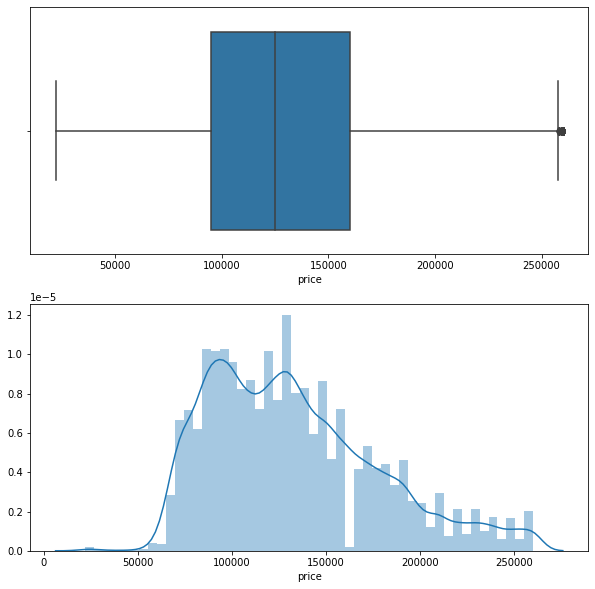

In [ ]:
# Price after outlier removed
fig, axs = plt.subplots(2,1, figsize = (10,10))
plt1 = sns.boxplot(property_df['price'], ax = axs[0])
sns.distplot(property_df['price'], ax = axs[1])
plt.savefig('price_univar.png')
plt.show()

In [ ]:
property_df.shape

(64212, 6)

Lets have a deeper look at the size variable now <br>

Size

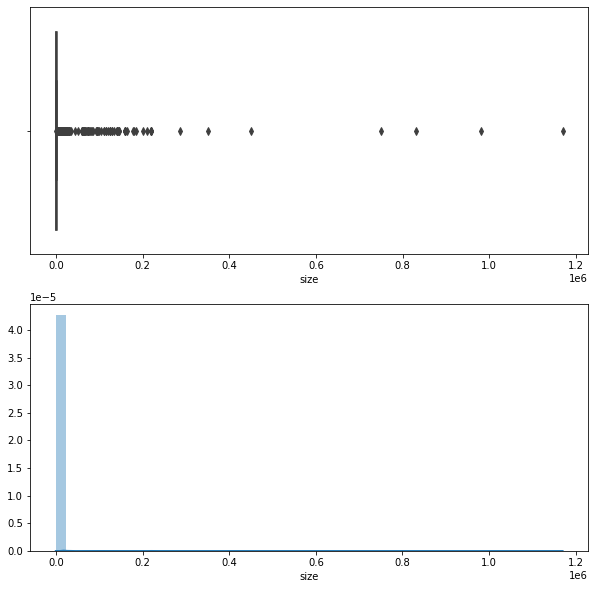

In [ ]:
# Outlier Analysis for size
fig, axs = plt.subplots(2,1, figsize = (10,10))
plt1 = sns.boxplot(property_df['size'], ax = axs[0])
sns.distplot(property_df['size'], ax = axs[1])

plt.show()

In [ ]:
property_df.quantile(0.95)

price       224,000.0
size          2,400.0
bedrooms          3.0
bathrooms         4.0
Name: 0.95, dtype: float64

Every properties having more than 2400 as size or a non positive number as size is also considered as an outlier

In [ ]:
property_df = property_df[(property_df['size'] <= 2400.0 ) & (property_df['size'] > 0.0 )]

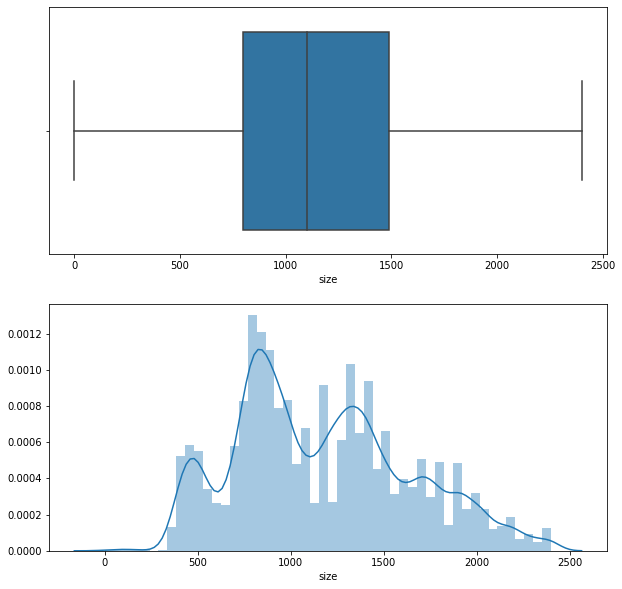

In [ ]:
# Size after outlier removed
fig, axs = plt.subplots(2,1, figsize = (10,10))
plt1 = sns.boxplot(property_df['size'], ax = axs[0])
sns.distplot(property_df['size'], ax = axs[1])
plt.savefig('size_univar.png')
plt.show()

In [ ]:
property_df.shape

(61053, 6)

Lets have a deeper look at the bathrooms & bedrooms variable now <br>

Bathrooms & Bedrooms

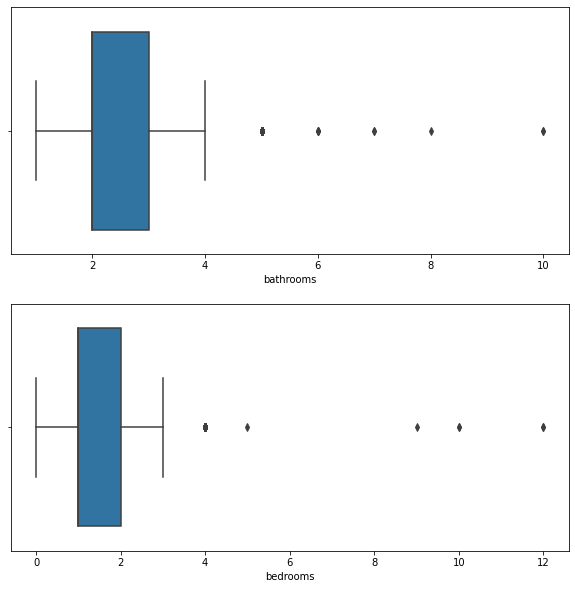

In [ ]:
# Outlier Analysis for bathrooms and bedrooms
fig, axs = plt.subplots(2,1, figsize = (10,10))
plt1 = sns.boxplot(property_df['bathrooms'], ax = axs[0])
plt1 = sns.boxplot(property_df['bedrooms'], ax = axs[1])

plt.show()

In [ ]:
property_df.quantile(0.95)

price       210,000.0
size          2,000.0
bedrooms          3.0
bathrooms         4.0
Name: 0.95, dtype: float64

Every properties having more than 4 bathrooms or 3 bedrooms are treated as outliers

In [ ]:
property_df = property_df[(property_df['bathrooms'] <= 4.0 ) & (property_df['bedrooms'] <= 3.0 )]

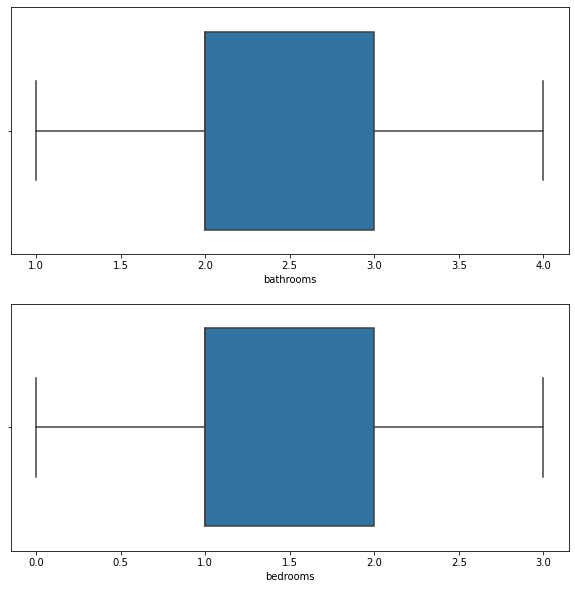

In [ ]:
#bedrooms and bathrooms after outlier removed

fig, axs = plt.subplots(2,1, figsize = (10,10))
plt1 = sns.boxplot(property_df['bathrooms'], ax = axs[0])
plt2 = sns.boxplot(property_df['bedrooms'], ax = axs[1])
plt.savefig('bed&bath_univar.png')
plt.show()

In [ ]:
property_df.shape

(57293, 6)

<h3>1.2 Bivariate Analysis

Lets have a look at the pairplot

<Figure size 1440x1440 with 0 Axes>

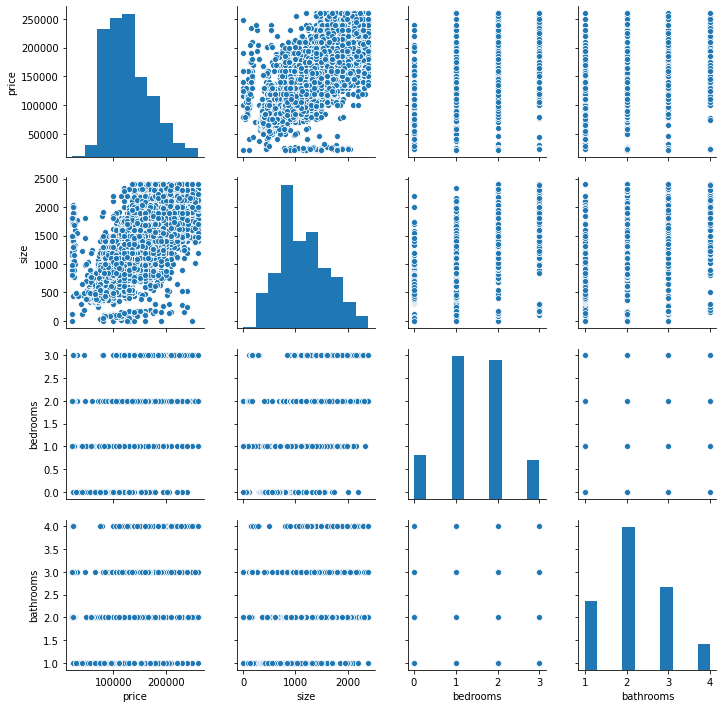

In [ ]:
plt.figure(figsize=(20,20 ))
sns.pairplot(property_df)
plt.savefig('pairplot.png')

price and size are highly correlated. A slight positive relation can be seen between price & bedrooms and price & bathrooms.Lets have a look at the pearson correlation values  

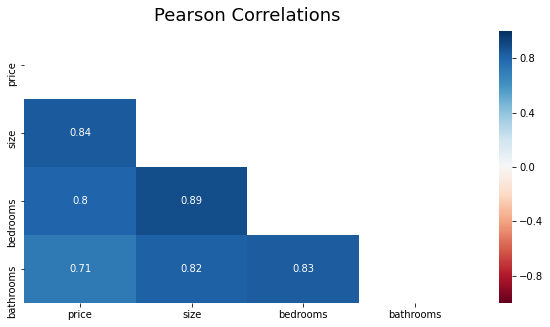

In [ ]:
plt.figure(figsize=(10, 5))

# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(property_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(property_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu')

heatmap.set_title('Pearson Correlations', fontdict={'fontsize':18}, pad=10)

plt.savefig('corr_plot.png')

As expected the correlation between price and size is really strong. If just one independent variable has to be selected to predict the price that would be size.<br>
Although the correlation between price and bedrooms/bathrooms are also higher, we need to take the pearson correlation numbers with a pich of salt since bathrooms or bedrooms are categorical variables. Lets do a drill down analysis taking 2 variables at to confirm the relationship with variables

>Price & Size

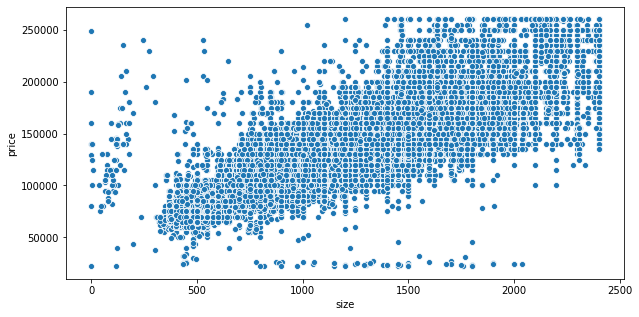

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=property_df, x="size", y="price")
plt.savefig('price vs size.png')

Price & Size have a strong positive linear relationship as can be seen here. Size would be the prime variable that is driving the price and will add great value in modelling  

>Price & Neighbourhood

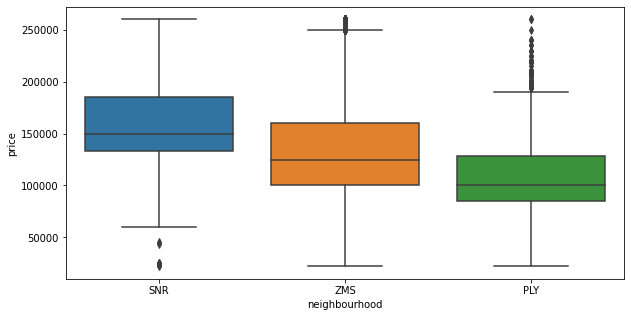

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
sns.boxplot(x = 'neighbourhood', y = 'price', data = property_df)
plt.savefig('price vs neighbourhood.png')


The box-whisker plots show property prices at SNR is relatively greater than that at ZMS which in turn is greater than properties at PLY in general. So neighbourhood is a good indicator of the prices and would be a valuable predictor variable in modelling  


>Price & bathrooms

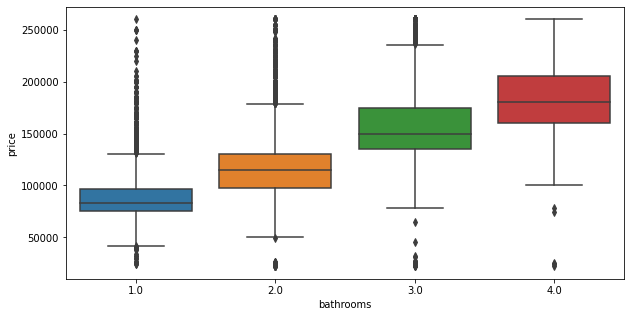

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
sns.boxplot(x = 'bathrooms', y = 'price', data = property_df)
plt.savefig('price vs bathrooms.png')

>Price & bedrooms

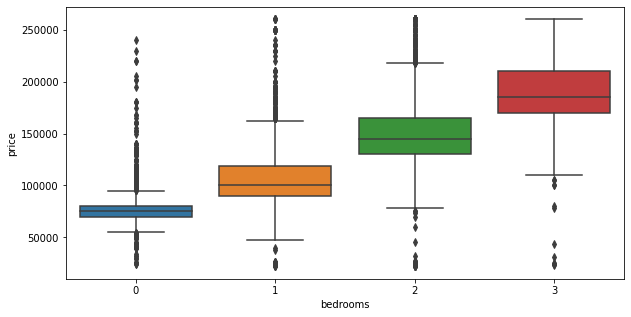

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
sns.boxplot(x = 'bedrooms', y = 'price', data = property_df)
plt.savefig('price vs bedrooms.png')

    These plots shows greater the number of bathrooms or bedrooms higher the price. So both number of bedrooms or bathrooms can also be good predictors of the property price

**Bivariate analysis shows that size,neighbourhood,bathrooms and bedrooms -all have some impact on the property price and can be valuable predictors in the modelling. Since the variable `building` is a nominal variable with high cardinality its not part of the bivariate analysis here, but it would be sensible to assume that `building` would be a critical variable in the property pricing and we will include the same in the modelling after encoding. End of the modelling we will also present a relative importance score to each of the variables considered**   

<h2>2. Modelling

We will be using **XGBoost Regression**, since predicting the prices is the ultimate objective of our exercise. XGBoost is one of the most most popular algorithm among data scientists. Since XGBoost is a tree based algorith, we do not have to do any scaling or feature selection while fitting the model. XGBoost also handles null values by itself. We will use a k-fold cross validator to tune the hyperparameters using grid search technique

    Steps involved in the model training are as follows
    2.1 Train test split
    2.2 Encoding categorical variables  
    2.3 XGBoost regression using cross-validation
    2.4 prediction and performance evaluation
    2.5 benchmarking results
    2.6 feature importance

In [ ]:
#import all necessary libraries here

import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# Checking Null values
property_df.isnull().sum()

neighbourhood       0
price               0
size                0
bedrooms            0
bathrooms           0
building         5063
dtype: int64

First, we can split the loaded dataset into input and output columns for training and evaluating a predictive model

**2.1 Train-Test Split**

In [ ]:
train, test = train_test_split(property_df, test_size=0.2)

**2.2 Encoding categorical variables**

* Mean encoding `building`

In [ ]:
#obtain mean property price for each building in train data

encod_type = train.groupby('building')['price'].mean()

#create a new column with mean property price of the building

train['building_mean_enc'] = train['building'].map(encod_type)
train = train.drop('building',axis =1)

#use the same mean values to encode building in test data

test['building_mean_enc'] = test['building'].map(encod_type)
test = test.drop('building',axis =1)

* Label encoding `bedrooms` and `bathrooms`

In [ ]:
label_encoder = LabelEncoder()

#encode bedrooms
train['bedrooms'] = label_encoder.fit_transform(train['bedrooms'])
test['bedrooms'] = label_encoder.transform(test['bedrooms'])

#encode bathrooms
train['bathrooms'] = label_encoder.fit_transform(train['bathrooms'])
test['bathrooms'] = label_encoder.transform(test['bathrooms'])

* One hot encoding `neighbourhood`

In [ ]:
train['neighbourhood_SNR'] = np.where((train.neighbourhood == 'SNR'), 1, 0)
train['neighbourhood_ZMS'] = np.where((train.neighbourhood == 'ZMS'), 1, 0)
train = train.drop('neighbourhood',axis =1)

In [ ]:
test['neighbourhood_SNR'] = np.where((test.neighbourhood == 'SNR'), 1, 0)
test['neighbourhood_ZMS'] = np.where((test.neighbourhood == 'ZMS'), 1, 0)
test = test.drop('neighbourhood',axis =1)

**2.3 XGB regression using cross-validation**

In [ ]:
#get the predictors and the response variable

X_train = train.loc[:, train.columns != 'price']
y_train = train['price']

X_test = test.loc[:, test.columns != 'price']
y_test = test['price']

In [ ]:
# Convert to optimized data-structure, which XGBoost supports

train_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test,label=y_test)

Fitting the model and tuning hyperparametrs by cross validation using Gridsearch

In [ ]:
%%time

warnings.filterwarnings('ignore')

xgb_model = xgb.XGBRegressor()

#define the parameter grid

params = {

    'max_depth':[4,10],
    'min_child_weight': [1.0],
    'eta':[0.4,0.8],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    # Other parameters
    'objective':['reg:squarederror'],
    'eval_metric':["mae"]}





cv_model = GridSearchCV(xgb_model, params, cv = KFold(n_splits=5), scoring='neg_mean_absolute_error')

#fit the model

cv_model = cv_model.fit(X_train, y_train)

CPU times: user 15min 28s, sys: 38.3 s, total: 16min 6s
Wall time: 21 s


In [ ]:
#For more details on each folds and each param tuples
#cv_model.cv_results_

In [ ]:
print ("The best XGBoost regression model that \
can be used to predict the property prices is defined using these set of parameters : \n\n----------------\
----------------Best Model-----------------------------------\n",cv_model.best_estimator_ )

The best XGBoost regression model that can be used to predict the property prices is defined using these set of parameters : 

--------------------------------Best Model-----------------------------------
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, eta=0.4,
             eval_metric='mae', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=10, min_child_weight=1.0, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=48,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)


**2.4 predcition and performance evaluation**

In [ ]:
# make predictions on test data

y_pred = cv_model.predict(X_test)

# Evaluate the error in unseen data
print('Mean Absolute Error in an unseen test data with XGBoost Model: {0:0.2f}'. format(mean_absolute_error(y_test, y_pred)))

Mean Absolute Error in an unseen test data with XGBoost Model: 7718.96


Lets evaluate how good our model is by comparing with a benchmark scenario. The benchmark scenario is when we predict the price of an unseen property as the average price of all known properties  

**2.5 benchmarking results**

In [ ]:
import numpy as np
# "Learn" the mean from the training data

mean_train = np.mean(y_train)

# Get predictions on the test set

baseline_predictions = np.ones(y_test.shape) * mean_train

# Compute MAE

mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Mean Absolute Error without any ML modelling is {:.2f}".format(mae_baseline))

Mean Absolute Error without any ML modelling is 33023.02


**2.6 feature importance score**

Feature importance indicates the relative importance of each feature when making a prediction.

In [ ]:
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')

In [ ]:
#create a new dataframe with importance score for each feature

feature_importances = np.round(cv_model.best_estimator_.feature_importances_, 2)
features = np.array(X_train.columns)
feature_importances = pd.DataFrame({'features':features, 'importances':feature_importances})

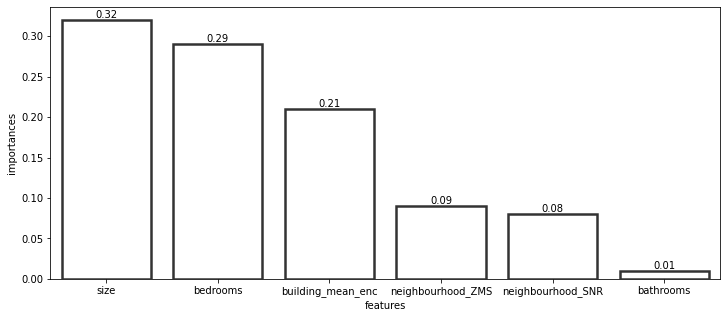

In [ ]:
#Create a bar plot of feature importance

plt.figure(figsize=(12, 5))
ax = sns.barplot(x="features", y="importances", data=feature_importances.sort_values('importances', ascending=False)
,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".6", edgecolor="0.2")
ax.bar_label(ax.containers[0])
plt.savefig('feature importance.png')

The hypothesis we had from EDA section that size would be the best predctor variable of the property price is corraborated by the model. Also it can be seen that mean encoding the building numbers has been good idea since `building_mean_enc` turns out to be a good predictor variable out of the 6    